# ClusterAI: Desafio Voice

El siguiente desafio tiene el objetivo de lograr el mejor resultado de clasificacion. Para eso deberan:
- Importar las librerias que consideren necesarias.
- Importar el dataset.
- Realizar los pre-procesamientos que consideren necesarios.
- Realizar la visualizacion o estadistica descriptiva que consideren necesaria.
- Aplicar feature selection (o no) para luego usar esas features en un modelo clasificador.
- Entrenar un modelo supervisado de clasificacion y reportar los resultados.
- Las etiquetas de cada muestra estan en la ultima columna "label"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
voice = pd.read_csv(r'C:\Users\PC\Downloads\Ciencia de datos\desafios-master\desafios-master\clusterai_2019_desafio_dataset_voice.csv', delimiter=',')

In [3]:
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
np.shape(voice)

(3168, 21)

In [11]:
voice.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [13]:
voice.index

RangeIndex(start=0, stop=3168, step=1)

In [19]:
voice_x = voice.iloc[:,0:20]
voice_x

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,0.112555,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,0.086197,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,0.128324,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,0.219103,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,0.011699,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920


In [21]:
voice_y = voice.iloc[:,20]
voice_y

0         male
1         male
2         male
3         male
4         male
5         male
6         male
7         male
8         male
9         male
10        male
11        male
12        male
13        male
14        male
15        male
16        male
17        male
18        male
19        male
20        male
21        male
22        male
23        male
24        male
25        male
26        male
27        male
28        male
29        male
         ...  
3138    female
3139    female
3140    female
3141    female
3142    female
3143    female
3144    female
3145    female
3146    female
3147    female
3148    female
3149    female
3150    female
3151    female
3152    female
3153    female
3154    female
3155    female
3156    female
3157    female
3158    female
3159    female
3160    female
3161    female
3162    female
3163    female
3164    female
3165    female
3166    female
3167    female
Name: label, Length: 3168, dtype: object

In [22]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
voice_y = le.fit_transform(voice_y)
voice_y

array([1, 1, 1, ..., 0, 0, 0])

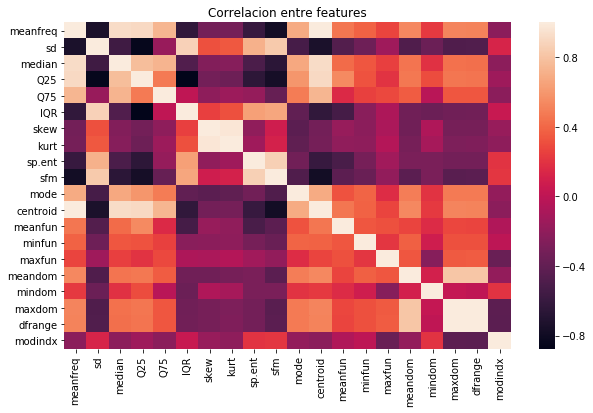

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(voice_x.corr())
plt.title("Correlacion entre features")
plt.show()


In [25]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(voice_x, voice_y, test_size=0.25, random_state=4)

In [27]:
scaler = preprocessing.StandardScaler().fit(xtrain)
scaler
xtrain_scal = scaler.transform(xtrain)  
xtest_scal = scaler.transform(xtest)

In [30]:
from sklearn.decomposition import PCA
# cantidad de componentes a extraer
n_comps = 8
# definimos PCA
pca = PCA(n_components= n_comps)
# fit_transform del PCA a nuestros datos
xpca = pd.DataFrame(pca.fit_transform(xtrain_scal))
# obtenemos los auto-valores
eigenvalues = pca.explained_variance_ratio_

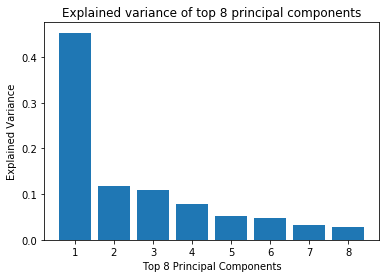

In [31]:
# Visualizamos PCA
components = range(1,n_comps + 1)
plt.bar(components,eigenvalues)
plt.xticks(components)
plt.title('Explained variance of top 8 principal components')
plt.xlabel('Top 8 Principal Components')
plt.ylabel('Explained Variance')
plt.show()

In [43]:
eigenvalues[0:5].sum()

0.8103161752390482

In [45]:
# importamos librerias de scikit learn para clasificacion y modelos de SVM.
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
# importamos librearias de Logistic Regression
from sklearn.linear_model import LogisticRegression
#Importamos librerias de Feature Selection
from sklearn.feature_selection import RFECV
from sklearn import linear_model
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.linear_model import Lasso
from sklearn.linear_model import lasso_path
from sklearn.feature_selection import VarianceThreshold

In [46]:
costrfe = 50
svcrfe = svm.SVC(C=costrfe, kernel="linear")

In [47]:
# creo un modelo de RFE indicando que clasificador utilizar, el CV y que scoring quiero determinar para seleccionar las features
rfe_cv = RFECV(estimator=svcrfe, step=1, cv=5, scoring='accuracy')

In [48]:
rfe_cv.fit(xtrain_scal, ytrain)
np.argmax(rfe_cv.grid_scores_)

11

Optimal number of features : 12


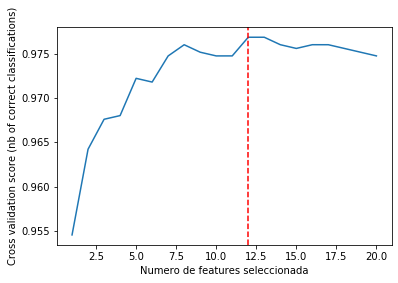

In [49]:
print("Optimal number of features : %d" % rfe_cv.n_features_)
plt.figure()
plt.xlabel("Numero de features seleccionada")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfe_cv.grid_scores_) + 1), rfe_cv.grid_scores_)
plt.axvline(x=np.argmax(rfe_cv.grid_scores_)+1, c= 'r', linestyle = '--')
plt.show()

In [50]:
feat_rfe = rfe_cv.support_ == True
feat_rfe

print("La cantidad de variables seleccionadas con RFE son = " + str(rfe_cv.n_features_))

La cantidad de variables seleccionadas con RFE son = 12


In [51]:
feat_rfe

array([ True, False, False,  True,  True,  True,  True, False,  True,
        True, False, False,  True,  True, False, False, False,  True,
        True,  True])

In [52]:
xtrain_scal_red_rfe = xtrain_scal[:,rfe_cv.support_]
np.shape(xtrain_scal_red_rfe)

(2376, 12)

In [53]:
xtrain_scal_red_rfe

array([[-0.74959111, -0.68594891,  0.12924143, ..., -0.82008492,
        -0.80769968, -0.1981853 ],
       [ 0.49348369,  0.84820298, -0.53692496, ...,  0.24918482,
         0.21101155,  0.17287382],
       [ 1.35694301,  1.50993963,  1.09343131, ..., -1.05474867,
        -1.04466077, -0.45977927],
       ...,
       [ 0.95108551,  1.1996488 , -0.05042622, ...,  0.45064144,
         0.4590456 , -0.42181682],
       [ 0.26730129, -0.12333388,  1.37498446, ..., -1.31597813,
        -1.30376776,  0.57123989],
       [ 0.40179418, -0.11592329,  1.30864574, ...,  1.06829415,
         1.07691611, -0.7016534 ]])

In [55]:
xtest_scal_red_rfe = xtest_scal[:,rfe_cv.support_]
np.shape(xtest_scal_red_rfe)

(792, 12)

In [56]:
# Entrenamos un modelo SVM con grid search y cross validation cv = 5
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100], 'gamma':[0.1, 1, 10]}
svc = svm.SVC(probability=True)
svm = GridSearchCV(svc, param_grid = parameters, refit = True, cv = 5)

In [58]:
svm.fit(xtrain_scal_red_rfe, ytrain.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'gamma': [0.1, 1, 10],
                         'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [59]:
print("The best parameters are %s with a score of %0.2f" % (svm.best_params_, svm.best_score_))

The best parameters are {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'} with a score of 0.98


In [60]:
ypred_svm=svm.predict(xtrain_scal_red_rfe)
train_acc_svm=accuracy_score(ytrain, ypred_svm)
print("El Accuracy train con SVM es " +str(train_acc_svm))

El Accuracy train con SVM es 0.9848484848484849


In [61]:
ypred2_svm=svm.predict(xtest_scal_red_rfe)
test_acc_svm=accuracy_score(ytest, ypred2_svm)
print("El Accuracy train con SVM es " +str(test_acc_svm))

El Accuracy train con SVM es 0.9772727272727273


In [63]:
yproba_svm=svm.predict_proba(xtest_scal_red_rfe)
fpr, tpr, thresholds = roc_curve(ytest.astype('int'), yproba_svm[:,1], drop_intermediate = False)
auc_svm=metrics.auc(fpr, tpr)
print("El AUC con SVM es "+str(auc_svm))

El AUC con SVM es 0.9934636771757985


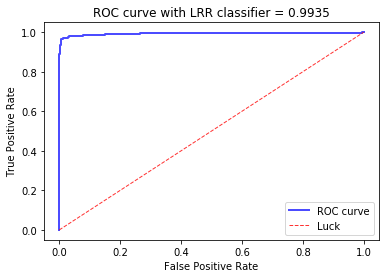

In [64]:
plt.plot(fpr, tpr, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with LRR classifier = '+str(np.round(auc_svm,4)))
plt.show()

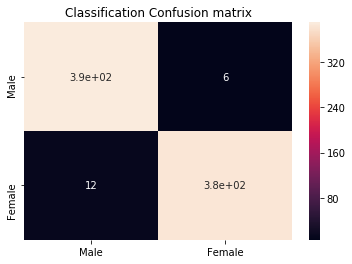

In [66]:
cm_svm = confusion_matrix(ytest, ypred2_svm)
cm_svm2 = pd.DataFrame(cm_svm, index = ['Male', 'Female'], columns = ['Male', 'Female'])
plt.figure(figsize = (6,4))
sns.heatmap(cm_svm2, annot=True)
plt.title('Classification Confusion matrix')
plt.show()